In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io as sio
import scipy.linalg as slg
from andylearn import mnist, KNNneighbor, PCA
#%matplotlib inline

In [4]:
def FLD(data, label, d):
    # Number of samples N; Dimensions D; Clases c
    [N, D] = data.shape
    c = len(np.unique(label))
    
    
    # W_opt.T = W_fld.T * W_pca.T
    # W_pca
    # Get the principal components of PCA with N-c largest eigenvalues
    W_pca, data_pca, average= PCA.PCA(data, N-c)
    
    # W_fld
    # S_B
    
    #total mean
    mean_total = data_pca.mean(axis=0)
    
    S_W = np.zeros((N-c, N-c)) 
    S_B = np.zeros((N-c, N-c))
    
    for i in range(1,c+1):
        # mean of class
        data_i = data_pca[np.where(label == i)]
        mean_i = data_i.mean(axis=0)
        S_B = S_B + N * np.dot((mean_i - mean_total).T, mean_i - mean_total)
        S_W = S_W + np.dot((data_i - mean_i).T, (data_i - mean_i))
        
    eigenvalues, eigenvectors = slg.eig(S_B, S_W)
    sort_eig = np.argsort(-eigenvalues)
    W_fld = eigenvectors[:, sort_eig[:d]]
   
    W_opt = np.dot(W_pca, W_fld)
    return W_opt

In [5]:
data = sio.loadmat("data/yale/Yale_32x32.mat")
face = data['fea']/256
face = np.squeeze(face)
label = data['gnd']
label = np.squeeze(label)

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


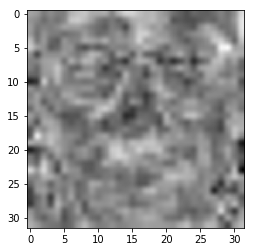

In [6]:
def Fisherface():
    W = FLD(face, label, 14)
    fisherface=W.T[1]
    fisherface=fisherface.reshape(32, 32).astype(float)
    pylab.imshow(fisherface.T, cmap='gray', interpolation='hamming')
    pylab.show()
Fisherface()

In [ ]:
def Leaving_one_out():
    ## 32 * 32 Yale_faces 
    s=0.0
    
    for i in range(165):
        index = [i for i in range(165)]
        index.remove(i) 
        trainface = np.squeeze(face[index])
        trainlabel = label[index]
        
        testface = face[i].reshape((1, 32*32))
        testlabel = label[i]
        
        mapping= FLD(trainface, trainlabel, 15)
        #mapping, tmp, tmp_= PCA(trainface, 30)
        traindata = np.dot(trainface, mapping)
        testdata = np.dot(testface, mapping)
        
        if(KNNneighbor.one_verification(traindata, trainlabel, testdata, testlabel, 1)==False):
            s+=1
    return s/165

s = Leaving_one_out()
print("score" ,s)

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [95]:
def Fisherfaces_ORL_acuracy():
    data=sio.loadmat("orl_faces/32_32/ORL_32x32.mat")
    face = data['fea']/255
    face = np.squeeze(face)
    label = data['gnd']
    label = np.squeeze(label)

    s=0.0
    for i in range(50):
        matfn = 'orl_faces/32_32/6Train/'+str(i+1)+'.mat'
        index = sio.loadmat(matfn)
        testIdx = index['testIdx'] -1    
        trainIdx = index['trainIdx'] -1

        trainface = np.squeeze(face[trainIdx])
        trainlabel = np.squeeze(label[trainIdx])
        testface = np.squeeze(face[testIdx])
        testlabel = np.squeeze(label[testIdx])

        #FLD
        mapping= FLD(trainface, trainlabel, 40)
        #mapping, tmp, tmp_= PCA(trainface, 30)
        traindata = np.dot(trainface, mapping)
        testdata = np.dot(testface, mapping)

        tmp=KNNneighbor.accuracy(traindata, trainlabel, testdata, testlabel, 1)
        s+=tmp
        print(tmp)
    print('s', s/50)
Fisherfaces_ORL_acuracy()

/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/huangzhenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.93125
0.96875
0.95
0.975
0.9375
0.98125
0.94375
0.975
0.925
0.975
0.95
0.95
0.95
0.9625
0.925
0.96875
0.95625
0.9625
0.975
0.975
0.94375
0.94375
0.96875
0.975
0.96875
0.9
0.96875
0.96875
0.95625
0.9375
0.91875
0.9625
0.925
0.9125
0.9375
0.975
0.96875
0.96875
0.94375
0.9375
0.96875
0.975
0.95625
0.94375
0.95
0.9375
0.94375
0.9375
0.9375
0.9375
s 0.952125
